# **MDI230 - Projet Trottinettes**

$Student : $

$\textcolor{orange}{
    - \Large Zakaria\ Akil\\
    - \Large Ayoub\ Benabbou\\
}
$

---

<div style="background: linear-gradient(to right, #ff0000, #0000ff); padding: 15px;">
    <h2 style="color: white;"> <strong> Sommaire :</h2>
</div>

1. Versions des librairies
2. Sujet 
3. Travail à effectuer


<div style="background: linear-gradient(to right, #ff0000, #0000ff); padding: 15px;">
    <h2 style="color: white;"><strong> Versions des modules utilisés :</h2>
</div>

- Pandas version:  2.0.3
- Numpy version:  1.24.3
- Seaborn version:  0.12.2
- Matplotlib version:  3.7.2

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm

try : 
    import networkx as nx
except ImportError:
    !pip install networkx matplotlib

In [92]:
#printing versions of libraries
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Seaborn version: ", sns.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)
print("Networkx version: ", nx.__version__)

Pandas version:  2.0.3
Numpy version:  1.24.3
Seaborn version:  0.12.2
Matplotlib version:  3.7.2
Networkx version:  3.1


<div style="background: linear-gradient(to right, #ff0000, #0000ff); padding: 15px;">
    <h2 style="color: white;"><strong>Sujet :</h2>
</div>

- On considère un système de trottinettes électriques en libres services.
Les trottinettes peuvent être empruntées et déposées n’importe où.
Lorsqu’une trottinette a sa batterie vide, un prestataire vient la chercher
pour la recharger. Lorsqu’une trottinette est en panne, un technicien
vient la chercher pour la réparer.
Il y a une flotte de **N** trottinettes. Le taux d’emprunt moyen est
de λ trottinettes par minute. On note $t_{trajet}$ le temps moyen d’un
trajet par un utilisateur. On considère que chaque trottinette a une
probabilité $p_{panne}$ de tomber en panne et une probabilité $p_{vide}$ d’avoir
sa batterie vide lorsqu’elle est utilisée. On suppose qu’une trottinette
non utilisée ne peut pas tomber en panne ou avoir une batterie vide.
On note enfin $t_{intervention}$ le temps moyen d’intervention d’un prestataire
ou d’un technicien, $t_{recharge}$ le temps moyen de recharge de la batterie
d’une trottinette, et $t_{réparation}$ le temps moyen de réparation pour une
trottinette. On considère qu’il y a suffisamment de prestataires et de
techniciens pour chercher, charger et réparer les trottinettes qui en ont besoin simultanément. On suppose que les trottinettes sont toujours
réparables.

**Données :**

- $N$ : Nombre total de trottinettes dans la flotte.

- $\lambda $ : Nombre moyen de trottinettes empruntées par minute.

- $t_{trajet}$ : Durée moyenne d'un trajet effectué par un utilisateur.

- $p_{panne}$ : Probabilité qu'une trottinette tombe en panne lorsqu'elle est utilisée.

- $p_{vide}$ : Probabilité qu'une trottinette ait sa batterie vide lorsqu'elle est utilisée.

- $t_{intervention}$ : Durée moyenne nécessaire à un prestataire ou technicien pour intervenir sur une trottinette en panne.

- $t_{recharge}$ : Durée moyenne nécessaire pour recharger la batterie d'une trottinette.

- $t_{réparation}$ : Durée moyenne nécessaire pour réparer une trottinette en panne.

**Application numériques :**

- $N = 100$ 

- $\lambda = 0.1\ min^{-1}$

- $t_{trajet} = 5\ min$ 

- $p_{panne} = 0.01$ 

- $p_{vide} = 0.1$

- $t_{intervention} = 30\ min$

- $t_{recharge} = 240\ min$

- $t_{réparation} = 720\ min$ 

In [15]:
N = 100 # Nombre de trottinettes
lambda_ = 0.1 # Taux moyen d'emprunt par minute (en min^-1)
t_trajet = 5 # Temps moyen d'un trajet par utilisateur (en min)
p_panne = 0.01 # Probabilité de panne
p_vide = 0.1 # Probabilité d'avoir la batterie vide pendant son utilisation
t_intervention = 30 # Temps moyen d'intervention d'un prestataire ou technicien (en min)
t_recharge = 240 # Temps moyen de recharge de la batterie d'une trottinette (en min)
t_reparation = 720 # Temps moyen de réparation pour une trottinette (en min)

<div style="background: linear-gradient(to right, #ff0000, #0000ff); padding: 15px;">
    <h2 style="color: white;"><strong>Travail à effectuer :</h2>
</div>

$\textcolor{darkgray}{Question\ 1:}$
Proposez un processus de Markov permettant de modéliser ce système
à partir d’un modèle vu en cours. Vous préciserez l’espace d’état et
les différents paramètres du système, vous pouvez vous aider d’un
diagramme de transitions.

$\textcolor{orange}{\to Réponse\ 1:}$

On peut modéliser ce système avec un processus de markov a l'aide du modèle des colonies qu'on a vu en cours.

L'espace des états $E = \{(n_1, ..., n_4) / \sum^4 _{j=1} n_j = N \}$, chaque colonie $n_i$ va correspondre à un état possible des trottinettes. On note ainsi les quatres colonies : 

- $n_{diponible}$ : Le nombre de trottinettes disponible pour etres empreintées
- $n_{en-utilisation}$ : Le nombre de trotinettes en usage
- $n_{en-panne}$ : Le nombre de trottinettes en panne
- $n_{dechargé}$ :  Le nombre de trottinettes déchargées

Nous avons ainsi le diagramme de transitions suivant : 

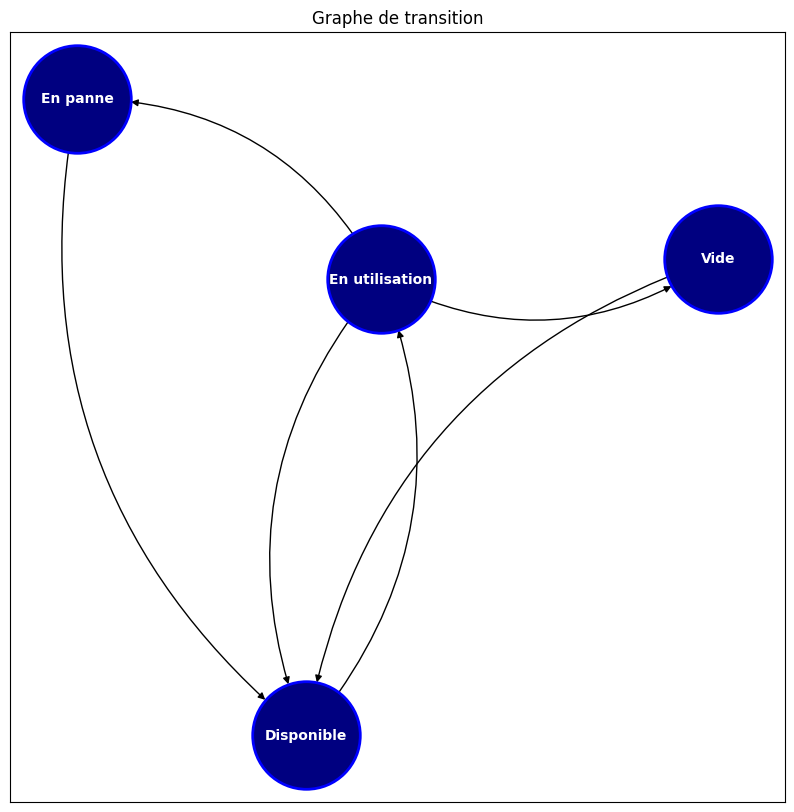

In [17]:
# Dessiner le graphe de transition
G = nx.DiGraph()
plt.figure(figsize=(10, 10))
# Ajouter les nœuds
G.add_edge('Disponible', 'En utilisation')
G.add_edge('En utilisation', 'En panne')
G.add_edge('En utilisation', 'Vide')
G.add_edge('En panne', 'Disponible')
G.add_edge('Vide', 'Disponible')
G.add_edge('En utilisation', 'Disponible')

# Définir la disposition des nœuds
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), connectionstyle="arc3,rad=0.3", arrows=True, arrowstyle='-|>', node_size=6000)
nx.draw_networkx_nodes(G, pos, node_size=6000, node_color='navy', edgecolors='blue', linewidths=2)

# Ajouter les étiquettes des nœuds
nx.draw_networkx_labels(G, pos, font_size=10, font_color='white', font_weight='bold')
plt.title('Graphe de transition')
plt.show()

$\textcolor{darkgray}{Question\ 2:}$
Calibrez votre modèle en explicitant vos paramètres en fonction des
données de l’énoncé.

$\textcolor{orange}{\to Réponse\ 2:}$
Calculons les 6 taux de transitions possibles : 

Pour simplifier les expressions on notera les colonies : $n_D$ (diponible) , $n_V$ (vide ou déchargée), $n_P$ (en panne), $n_U$ (en utilisation)$

- $q (n, T_{D,U}(n)) = \phi_D (n_D) . \lambda_{D,U} = \mathbb{1}_{\{ n_D > 0\}} \lambda$

- $q (n, T_{U,D}(n)) = \phi_U (n_U) . \lambda_{U,D} = n_U \frac{1}{t_{trajet}}.(1-(p_{vide}+p_{panne}))$

- $q (n, T_{U,V}(n)) = \phi_U (n_U) . \lambda_{U,V} = \phi_U (n_U) . \lambda_{U}.p_{vide}  = n_U \frac{p_{vide}}{t_{trajet}}$

- $q (n, T_{U,P}(n)) = \phi_U (n_U) . \lambda_{U,P} = \phi_U (n_U) . \lambda_{U}.p_{panne}  = n_U \frac{p_{panne}}{t_{trajet}}$

- $q (n, T_{V,D}(n)) = \phi_V (n_V) . \lambda_{V,D} = \frac{n_V}{t_{recharge} + t_{intervention}}$

- $q (n, T_{P,D}(n)) = \phi_P (n_P) . \lambda_{P,D} = \frac{n_P }{t_{réparation} + t_{intervention}}$

$\textcolor{darkgray}{Question\ 3:}$
Donnez l’expression de la probabilité stationnaire théorique de votre
modèle.

$\textcolor{orange}{\to Réponse\ 3:}$

- D'après le théorème du cours : 

$\forall n \in E;$
$$\pi (n) = \frac{1}{K}\prod_{i=1}^{J=4} \left[  \frac{\alpha^{n_i}_{i}}{\prod_{k=1}^{n_i} \phi_k (k)}\right]$$
On developpe : 
$$\pi ((n_D, n_U, n_P, n_V )) = \frac{1}{K}. \frac{\alpha^{n_D}_{D}}{1} .\frac{\alpha^{n_U}_{U}}{n_U!} .\frac{\alpha^{n_P}_{P}}{n_P!} .\frac{\alpha^{n_V}_{V}}{n_V!}$$
On résoud les équations de trafic : 
$$ 
\begin{cases}
  \alpha_{j} > 0, j \in \{D, U, P, V\} \\
  \alpha_{j} \sum_{k \in \{D, U, P, V\}, \\ k \neq j} \lambda_{j,k} = \sum_{l \in \{D, U, P, V\}, \\ l \neq j} \alpha_{l} \lambda_{l,j}
\end{cases}

\implies 
\begin{cases}
  \frac{\alpha_{P}}{t_{intervention} + t_{réparation}} = \frac{\alpha_{U}.p_{panne}}{t_{trajet}} \\

\\
  \alpha_{D}.\lambda = \frac{\alpha_{U}(1-p_{panne} - p_{vide})}{t_{trajet}} + \frac{\alpha_{P}}{t_{intervention} + t_{réparation}} + \frac{\alpha_{V}}{t_{intervention} + t_{recharge}}\\

\\
  \frac{\alpha_{V}}{t_{intervention} + t_{recharge}} = \frac{\alpha_{U}.p_{vide}}{t_{trajet}} \\
  \\
  
  \frac{\alpha_{U}}{t_{trajet}} = \alpha_{D} \lambda \\
\end{cases}

$$

On obtient ainsi un système linéaire ayant un rang de 3, ce qui est inférieur à 4. Par conséquent, la matrice n'est pas inversible et cela se traduit par un degré de liberté (solution non unique). Pour résoudre cela, on fixe $\alpha_{U} = C$, où C est une constante strictement positive quelconque. Ainsi, on obtient :
$$
\begin{cases}
  \alpha_{D} = \frac{C}{\lambda t_{trajet}} \\
  \alpha_{U} = C\\

  \alpha_{P} = \frac{C.p_{panne}.(t_{intervention} + t_{réparation})}{t_{trajet}} \\
  \alpha_{V} = \frac{((1-C)p_{panne} + p_{vide})(t_{intervention} + t_{recharge})}{t_{trajet}} \\
  
  
\end{cases}
$$

In [64]:
# Calcule des coefficients alphas. 

# Fixer la valeur de C 
C = 0.1

alpha_D = C / (lambda_ * t_trajet)
alpha_U = C
alpha_P = (C*p_panne*(t_intervention + t_reparation)) / t_trajet
alpha_V = (t_intervention + t_reparation)*(p_panne + p_vide -C*p_panne)/ t_trajet

print("Coefficients alpha :\n --------------------------------")
print("alpha_D = ", alpha_D)
print("alpha_U = ", alpha_U)
print("alpha_P = ", alpha_P)
print("alpha_V = ", alpha_V)


Coefficients alpha :
 --------------------------------
alpha_D =  0.2
alpha_U =  0.1
alpha_P =  0.15
alpha_V =  16.35


$\textcolor{darkgray}{Question\ 4:}$
Simulez les trajectoires de votre modèle sur au moins 100h.

$\textcolor{orange}{\to Réponse\ 4:}$

- Remarquons que pendant la simulation, à chaque itération, on effectue un tirage aléatoire de toutes les durées e, et on ne prend en considération que la durée minimale correspondant à l'événement qui se produira en premier. Les autres durées sont oubliées et non sauvegardées pour la détermination du prochain événement. Ceci est rendu possible grâce au fait qu'un processus de Markov a un effet sans mémoire. Un exemple simple illustrant cela est le paradoxe de l'autobus que nous avons vu en cours.

In [19]:

def probabilites_transitions(etat):
    '''
    Calcul des probabilités de transition entre les etats de la chaine de markov.

    Parameters
    ----------
    etat : str
        Etat courant = [ N_d, N_u, N_p, N_v]
            N_d : int
                Nombre de trottinettes disponibles
            N_u : int
                Nombre de trottinettes en utilisation   
            N_p : int
                Nombre de trottinettes en panne
            N_v : int
                Nombre de trottinettes déchargées
    Returns
    -------

    transitions : dict
        Dictionnaire des probabilités de transition entre les colonies
    q_total : float
        Taux total de transition
    '''
    N_d, N_u, N_p, N_v = etat[0], etat[1], etat[2], etat[3]

    # calcul des taux de trasitions q : 
    q_du = (N_d>0)*lambda_
    q_ud = N_u *(1- (p_panne + p_vide))/t_trajet 
    q_uv = N_u *p_vide/t_trajet 
    q_up = N_u *p_panne/t_trajet 
    q_vd = N_v/(t_recharge + t_intervention)
    q_pd = N_p/(t_reparation + t_intervention)

    # Rerourner les transitions avec leurs taux.
    transitions = {'du': q_du,
            'ud': q_ud, 'up': q_up, 'uv': q_uv,
            'pd': q_pd,
            'vd': q_vd}
    
    q_total = q_du + q_ud + q_uv + q_up + q_vd + q_pd
    return transitions, q_total

In [20]:
# Détermination de l'état suivant

def etat_suivant(etat_courant, transitions, q_total):
    '''
    Détermination de l'état suivant du processus de markov.

    Parameters
    ----------
    etat_courant : str
        Etat courant = [ N_d, N_u, N_p, N_v]     
    transitions : dict
        Dictionnaire des probabilités de transition entre les colonies
    q_total : float
        Taux total de transition

    Returns
    -------
    etat_suivant : str
        Nouvel état
    '''
    nouvel_etat = etat_courant.copy()
    # Tirage de la trasition suivant les taux calculés
    prochaine_transition = np.random.choice(list(transitions.keys()), p=[transitions[key]/q_total for key in transitions.keys()]) # On n'oublie pas de normaliser les taux de transition.
    # Mise à jour de l'état
    match prochaine_transition:
        case 'du':
            nouvel_etat[0] -= 1 # N_d
            nouvel_etat[1] += 1 # N_u
        case 'ud':
            nouvel_etat[1] -= 1 # N_u
            nouvel_etat[0] += 1 # N_d
        case 'up':
            nouvel_etat[1] -= 1 # N_u
            nouvel_etat[2] += 1 # N_p
        case 'uv':
            nouvel_etat[1] -= 1 # N_u
            nouvel_etat[3] += 1 # N_v
        case 'pd':
            nouvel_etat[2] -= 1 # N_p
            nouvel_etat[0] += 1 # N_d
        case 'vd':
            nouvel_etat[3] -= 1 # N_v
            nouvel_etat[0] += 1 # N_d
    return nouvel_etat

- On utilise une fonction pour la simulation pour pouvoir l'appeler à plusieurs reprises avec des paramètres différent.

    Remarque : 

- Les epsilons qui séparent deux changements d'etats suivent un loi exponontielle qui resulte du minimume des lois exponentielles pour chaque transition possible. 

In [34]:

def simulation(duree_simulation, etat_initial):
    '''
    Simulation du modele des colonies.

    Parameters
    ----------
    duree_simulation : int
        Durée de la simulation en minutes
    etat_initial : list
        Etat initial : [ N_d, N_u, N_p, N_v]

    Returns
    -------
    etats : list
        Liste des états du processus de markov
    '''
    # Initialisation
    etat = etat_initial
    t = 0

    # Créer un DataFrame pour enregistrer les états
    df = pd.DataFrame(columns=['t', 'N_disponible', 'N_utilisation', 'N_panne', 'N_vide'])
    df.loc[0] = [0, etat[0], etat[1], etat[2], etat[3]]

    while t < duree_simulation:
        transitions, q_total = probabilites_transitions(etat)
        # Calcul de la duree qui nous separe de la prochaine transition --> on fait le minimum des lois exponentielles.
        e = np.random.exponential(1/q_total) # cette méthode prend en parametre beta = 1/lambda et pas lambda.
        t += e # Timr jumping
        if t < duree_simulation:
            etat = etat_suivant(etat, transitions, q_total)
            df.loc[len(df)] = [t,etat[0], etat[1], etat[2], etat[3]]
    return df

In [35]:
#Simulation
# Init des colonies
etat_initial = [N, 0, 0, 0]
duree_simulation = 6000 # <=> 100h
evolution = simulation(duree_simulation=duree_simulation, etat_initial = etat_initial)


In [36]:
evolution.head()

,t,N_disponible,N_utilisation,N_panne,N_vide
0,0.000000,100.0,0.0,0.0,0.0
1,2.894715,99.0,1.0,0.0,0.0
2,5.934220,98.0,2.0,0.0,0.0
3,6.106672,99.0,1.0,0.0,0.0
4,11.627257,100.0,0.0,0.0,0.0


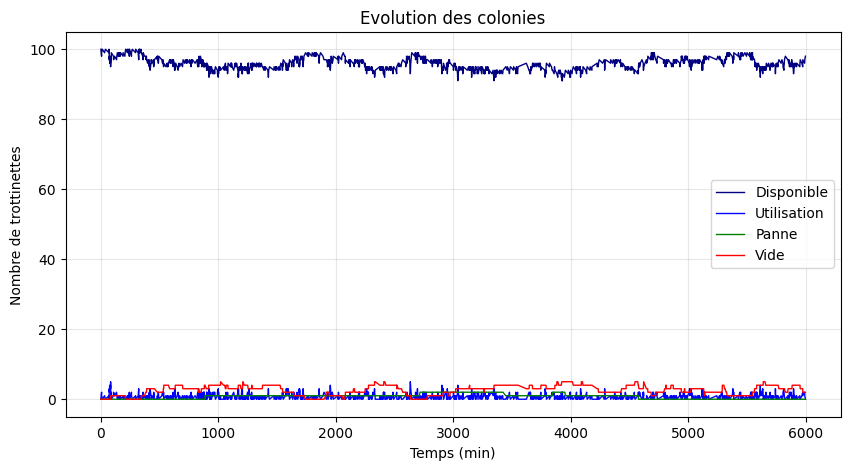

In [38]:
# Tracage de l'évolution des colonies
plt.figure(figsize=(10, 5))
plt.plot(evolution['t'], evolution['N_disponible'], label='Disponible', color='navy', linewidth=1)
plt.plot(evolution['t'], evolution['N_utilisation'], label='Utilisation', color='blue', linewidth=1)
plt.plot(evolution['t'], evolution['N_panne'], label='Panne', color='green', linewidth=1)
plt.plot(evolution['t'], evolution['N_vide'], label='Vide', color='red', linewidth=1)
plt.xlabel('Temps (min)')
plt.ylabel('Nombre de trottinettes')
plt.title('Evolution des colonies')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


$\textcolor{darkgray}{Question\ 5:}$
Validez votre simulation grâce aux résultats théoriques. Pour cela, on
limitera le nombre de trottinettes à N = 2. Vous devrez proposer deux
manières d’approcher la probabilité stationnaire par vos simulations.
On rappelle qu’une simulation est valide si les résultats théoriques
sont dans l’intervalle de confiance des résultats simulés.

$\textcolor{orange}{\to Réponse\ 5:}$

- Pour $N=2$, nous avons $10$ états possibles et donc $10$ probabilités stationnaires $\pi (n)$ à estimer.

In [73]:
ensembles_etats = [[2, 0, 0, 0], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1], [0, 2, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 2, 0], [0, 0, 1, 1], [0, 0, 0, 2]]

- La premiere étape est de calculer les 10 probabilités stationnaires théoriques :

In [74]:
# Calcul des probabilités stationnaires Théoriques
def proba_stationnaires_theoriques(state):
    '''
    Calcul des probabilités stationnaires théoriques non normalisées.

    Parameters
    ----------
    state : list
        L'etat dont on veut calculer la probabilité stationnaire

    Returns
    -------
    proba : float
        Probabilité stationnaire non normalisée
    '''
    N_d, N_u, N_p, N_v = state[0], state[1], state[2], state[3]
    # Calcul de la probabilité stationnaire
    proba = (alpha_D**N_d)* (alpha_U**N_u) * (alpha_P**N_p) * (alpha_V**N_v)/(np.math.factorial(N_u)*np.math.factorial(N_p)*np.math.factorial(N_v))
    return proba

In [75]:
# Pour N = 2 
PI_theoriques = [proba_stationnaires_theoriques(etat) for etat in ensembles_etats]
PI_theoriques = PI_theoriques/np.sum(PI_theoriques)
print("Probabilités stationnaires théoriques pour N=2:\n ", PI_theoriques)
print("--------------")
print("Vérification de la somme des probabilités stationnaires théoriques : ", np.sum(PI_theoriques))


Probabilités stationnaires théoriques pour N=2:
  [2.83406547e-04 1.41703273e-04 2.12554910e-04 2.31684852e-02
 3.54258183e-05 1.06277455e-04 1.15842426e-02 7.97080913e-05
 1.73763639e-02 9.47011832e-01]
--------------
Vérification de la somme des probabilités stationnaires théoriques :  1.0


---
- Le but étant d'estimer la probabilité stationnaire de chaque état, nous allons nous appuyer sur l'estimation de monte carlo qui va consister à effectuer un grand nombre de simulations et d'utiliser les proportions pour l'estimation. 

    - Méthode 1 : Estimation basée sur la durée des états

- Ici nous allons faire une simulation de longue durée T et on va utiliser cet estimateur :
$$\boxed{\hat{\pi}(n) = \frac{1}{T}\sum \tau_i (n)},\ s.t : \tau_i(n) \text{ est la durée de la n-ième occurance de l'état n}$$

In [76]:
# Estimation des probabilités stationnaires des etats possibles 
def pi_estimateur1(N, ensembles_etats, duree_simulation):
    '''
    Estimation des probabilités stationnaires des états possibles.

    Parameters
    ----------
    evolution : DataFrame
        Evolution des colonies
    ensembles_etats : list
        Liste des états possibles

    Returns
    -------
    proba_stationnaire : dict
        Dictionnaire des probabilités stationnaires
    '''
    # Initialisation
    etat_initial = [N, 0, 0, 0]
    evolution = simulation(duree_simulation=duree_simulation, etat_initial = etat_initial)
    
    proba_stationnaire = {}
    for etat in ensembles_etats:
        proba_stationnaire[tuple(etat)] = 0
    # Calculer le temps total de la simulation
    temps_total = evolution['t'].values[-1]
    # Calculer le temps dans chaque etat
    for etat in ensembles_etats:
        N_d, N_u, N_p, N_v = etat[0], etat[1], etat[2], etat[3]
        temps = 0
        for i in range(len(evolution)-1):
            if evolution['N_disponible'].values[i] == N_d and evolution['N_utilisation'].values[i] == N_u and evolution['N_panne'].values[i] == N_p and evolution['N_vide'].values[i] == N_v:
                temps += evolution['t'].values[i+1] - evolution['t'].values[i]
        proba_stationnaire[tuple(etat)] = temps/temps_total

        

    return proba_stationnaire

In [79]:
# Estimation des probabilités stationnaires des etats possibles
N = 2 
duree_simulation = 6000
proba_stationnaire = pi_estimateur1(N, ensembles_etats, duree_simulation)
print("Somme des probabilités stationnaires estimées : ", sum(proba_stationnaire.values()))
print("Probabilité stationnaire estimée :")
proba_stationnaire

Somme des probabilités stationnaires estimées :  1.0
Probabilité stationnaire estimée :


{(2, 0, 0, 0): 0.03289367630983068,
 (1, 1, 0, 0): 0.01746218031812579,
 (1, 0, 1, 0): 0.11488133026324458,
 (1, 0, 0, 1): 0.17943879562143664,
 (0, 2, 0, 0): 0.0058341803528772175,
 (0, 1, 1, 0): 0.04816455188236363,
 (0, 1, 0, 1): 0.09445301198534967,
 (0, 0, 2, 0): 0.0,
 (0, 0, 1, 1): 0.262407059107907,
 (0, 0, 0, 2): 0.2444652141588648}

In [84]:
# Intervalle de confiance de l'estimateur 1
n_estimations = 100

estimations_list = []
for i in range(n_estimations):
    PI_estimee = pi_estimateur1(N, ensembles_etats, duree_simulation)
    estimations_list.append(list(PI_estimee.values()))
#calcul de l'esperance empirique
mean1 = np.zeros(10)
for i in range(10):
    mean1[i] = np.sum([estimations[i] for estimations in estimations_list])/n_estimations

# calcul de la variance :
var1 = np.zeros(10)
for i in range(10):
    for estimations in estimations_list:
        var1[i] += (estimations[i] - mean1[i])**2
var1 = var1/(n_estimations-1)
#calcul de l'intervalle de confiance
alpha = 0.99
quantile = norm.ppf(1 - alpha/2)
borne_inf = mean1 - quantile*np.sqrt(var1/n_estimations)
borne_sup = mean1 + quantile*np.sqrt(var1/n_estimations)  

print("Intervalle de confiance de l'estimateur 1 :")
for i in range(10):
    print(f"Etat {ensembles_etats[i]} : [{borne_inf[i]}, {borne_sup[i]}] ; Valeur réelle : {PI_theoriques[i]}")
    


Intervalle de confiance de l'estimateur 1 :
Etat [2, 0, 0, 0] : [0.08881494265750162, 0.08891755202434362] ; Valeur réelle : 0.00028340654669122857
Etat [1, 1, 0, 0] : [0.044038819888864926, 0.04409055298679849] ; Valeur réelle : 0.00014170327334561429
Etat [1, 0, 1, 0] : [0.051280572124525164, 0.05139818294526062] ; Valeur réelle : 0.0002125549100184214
Etat [1, 0, 0, 1] : [0.22955809838615768, 0.22974092187970205] ; Valeur réelle : 0.023168485192007936
Etat [0, 2, 0, 0] : [0.010799424765048698, 0.010815061020222031] ; Valeur réelle : 3.542581833640357e-05
Etat [0, 1, 1, 0] : [0.025943835135886238, 0.026006767231089946] ; Valeur réelle : 0.0001062774550092107
Etat [0, 1, 0, 1] : [0.1141813067257795, 0.11426995474614718] ; Valeur réelle : 0.011584242596003968
Etat [0, 0, 2, 0] : [0.012316053721237225, 0.01241946366688911] ; Valeur réelle : 7.970809125690803e-05
Etat [0, 0, 1, 1] : [0.1430249178888836, 0.14333684103844824] ; Valeur réelle : 0.01737636389400595
Etat [0, 0, 0, 2] : [0.279

    - Méthode 2 : Estimation basée sur l'occurence des états

- Ici nous allons faire une simulation de longue durée T, nous obtenons ainsi un tableau d'évolution de M lignes :
$$\boxed{\hat{\pi}(n_k) = \frac{1}{M-s}\sum_{i=s} ^M 1_{\{n(i)=n_k\}}},\ s.t : n(i) \text{ est l'état obtenu à l'instant d'indice i}$$
- s : est l'instant à partir duquel on considère le régime permanent.

In [85]:
# Estimation des probabilités stationnaires des etats possibles 
def pi_estimateur2(N, ensembles_etats, duree_simulation, s):
    '''
    Estimation des probabilités stationnaires des états possibles.

    Parameters
    ----------
    N : int
        Nombre de trottinettes
    ensembles_etats : list
        Liste des états possibles
    duree_simulation : int
        Durée de la simulation en minutes
    s : int
        Début de la phase stationnaire

    Returns
    -------
    proba_stationnaire : dict
        Dictionnaire des probabilités stationnaires
    '''
    # Simulation
    etat_initial = [N, 0, 0, 0]
    evolution = simulation(duree_simulation=duree_simulation, etat_initial = etat_initial)
    regime_stationnaire = evolution[evolution['t']>=s] # On ne garde que les valeurs à partir de s
    regime_stationnaire = regime_stationnaire[['N_disponible', 'N_utilisation', 'N_panne', 'N_vide']].values
    #Initialisation
    proba_stationnaire = {}
    for etat in ensembles_etats:
        proba_stationnaire[tuple(etat)] = 0

    # Calcul des probabilités stationnaires
    K = len(regime_stationnaire)
    for n in regime_stationnaire:
        proba_stationnaire[tuple(n)] += 1/K
        
    return proba_stationnaire

In [88]:
# Estimation des probabilités stationnaires des etats possibles
N = 2 
duree_simulation = 40000
s = 15000
proba_stationnaire = pi_estimateur2(N, ensembles_etats, duree_simulation, s)
print("Somme des probabilités stationnaires estimées : ", sum(proba_stationnaire.values()))
print("Probabilité stationnaire estimée :\n (N_d, N_u, N_p, N_v) : P(n = (N_d, N_u, N_p, N_v))")
proba_stationnaire

Somme des probabilités stationnaires estimées :  1.0000000000000002
Probabilité stationnaire estimée :
 (N_d, N_u, N_p, N_v) : P(n = (N_d, N_u, N_p, N_v))


{(2, 0, 0, 0): 0.11056401074306184,
 (1, 1, 0, 0): 0.16606982990152203,
 (1, 0, 1, 0): 0.06445837063563119,
 (1, 0, 0, 1): 0.25470008952551465,
 (0, 2, 0, 0): 0.056401074306177294,
 (0, 1, 1, 0): 0.06445837063563119,
 (0, 1, 0, 1): 0.25067144136078795,
 (0, 0, 2, 0): 0,
 (0, 0, 1, 1): 0.008952551477170997,
 (0, 0, 0, 2): 0.023724261414503147}

In [89]:
# Intervalle de confiance de l'estimateur 2
n_estimations = 100

estimations_list = []
for i in range(n_estimations):
    PI_estimee = pi_estimateur2(N, ensembles_etats, duree_simulation, s)
    estimations_list.append(list(PI_estimee.values()))
#calcul de l'esperance empirique
mean2 = np.zeros(10)
for i in range(10):
    mean2[i] = np.sum([estimations[i] for estimations in estimations_list])/n_estimations

# calcul de la variance :
var2 = np.zeros(10)
for i in range(10):
    for estimations in estimations_list:
        var2[i] += (estimations[i] - mean2[i])**2
var2 = var2/(n_estimations-1)
#calcul de l'intervalle de confiance
alpha = 0.99
quantile = norm.ppf(1 - alpha/2)
borne_inf = mean2 - quantile*np.sqrt(var2/n_estimations)
borne_sup = mean2 + quantile*np.sqrt(var2/n_estimations)  

print("Intervalle de confiance de l'estimateur 2 :")
for i in range(10):
    print(f"Etat {ensembles_etats[i]} : [{borne_inf[i]}, {borne_sup[i]}] ; Valeur réelle : {PI_theoriques[i]}")

Intervalle de confiance de l'estimateur 2 :
Etat [2, 0, 0, 0] : [0.09478980436901528, 0.09483312922667188] ; Valeur réelle : 0.00028340654669122857
Etat [1, 1, 0, 0] : [0.14020961492441272, 0.14027254486683058] ; Valeur réelle : 0.00014170327334561429
Etat [1, 0, 1, 0] : [0.07896994492804922, 0.07904451298120328] ; Valeur réelle : 0.0002125549100184214
Etat [1, 0, 0, 1] : [0.2648453317270957, 0.26492979610132705] ; Valeur réelle : 0.023168485192007936
Etat [0, 2, 0, 0] : [0.04561367177650359, 0.045635910249218536] ; Valeur réelle : 3.542581833640357e-05
Etat [0, 1, 1, 0] : [0.07844738489953644, 0.07852197865145673] ; Valeur réelle : 0.0001062774550092107
Etat [0, 1, 0, 1] : [0.2598748254437569, 0.2599593183621213] ; Valeur réelle : 0.011584242596003968
Etat [0, 0, 2, 0] : [0.0008134546242858956, 0.0008151398050062838] ; Valeur réelle : 7.970809125690803e-05
Etat [0, 0, 1, 1] : [0.010295316440358367, 0.010304089337569714] ; Valeur réelle : 0.01737636389400595
Etat [0, 0, 0, 2] : [0.0259

    Remarque : 
Nous constatons que les valeurs réelle de la probabilité stationnaire ne tombent pas forcément dans les intervalles de confiances des deux estimateurs conçus. Cela montre la difficulté d'avoir un estimateur simple et robuste pour la probabilité stationnaire.

$\textcolor{darkgray}{Question\ 6:}$
Que faudrait-il changer au modèle si on considérait qu’il y a un
nombre fini de prestataires $n_p$ et un nombre fini de techniciens $n_t$ ?

$\textcolor{orange}{\to Réponse\ 6:}$

- Si on avait un nombre fini de prestataires $n_{prestataires}$ et un nombre fini de techniciens $n_{techniciens}$,  il serait nécessaire de modifier les taux de transition : $q_{vd}$ (de "vide" vers "disponible") et $q_{vd}$ (de "en panne vers "disponible"). Plus précisément, il faudrait modifier les valeurs de $\phi_V$ et $\phi_P$, nous aurions ainsi ces nouvelles expressions : 
$$ \phi_V' =min(n_V, n_{prestataires}) \text{ et } \phi'_P = min(n_P, n_{techniciens}) $$
Donc :
$$

 \boxed{q (n, T_{V,D}(n)) = \phi_V' (n_V) . \lambda_{V,D} = \frac{min(n_V, n_{prestataires})}{t_{recharge} + t_{intervention}}} \\



\boxed{q (n, T_{P,D}(n)) = \phi_P' (n_P) . \lambda_{P,D} = \frac{min(n_P, n_{techniciens}) }{t_{réparation} + t_{intervention}}} ,\\ 
$$

$\textcolor{darkgray}{Question\ 7:}$
Que faudrait-il changer au modèle si on considérait qu’une trottinette
pouvait devenir irréparable avec une probabilité $p_i$ ?

$\textcolor{orange}{\to Réponse\ 7:}$
 
- Si l'on considérait qu'une trottinette pouvait devenir irréparable avec une probabilité $p_i$, il faudrait ajouter une colonie de puits à laquelle les trottinettes entrantes ne sortent jamais. Nous aurions alors 5 colonies au total. Il serait donc nécessaire d'ajouter un taux de transition à calculer $q_{PI}$, et la valeur de $q_{PD}$ ne resterait pas la même.

$$

 \boxed{q (n, T_{P,I}(n)) = \phi_P (n_P) . \lambda_{P,I} = \frac{n_P .p_i}{t_{réparation} + t_{intervention}} }\\



\boxed{q (n, T_{P,D}(n)) = \phi_P' (n_P) . \lambda_{P,D} = \frac{n_P .(1-p_i) }{t_{réparation} + t_{intervention}}} ,\\ 
$$


    - Graphe de transitions dans ce cas

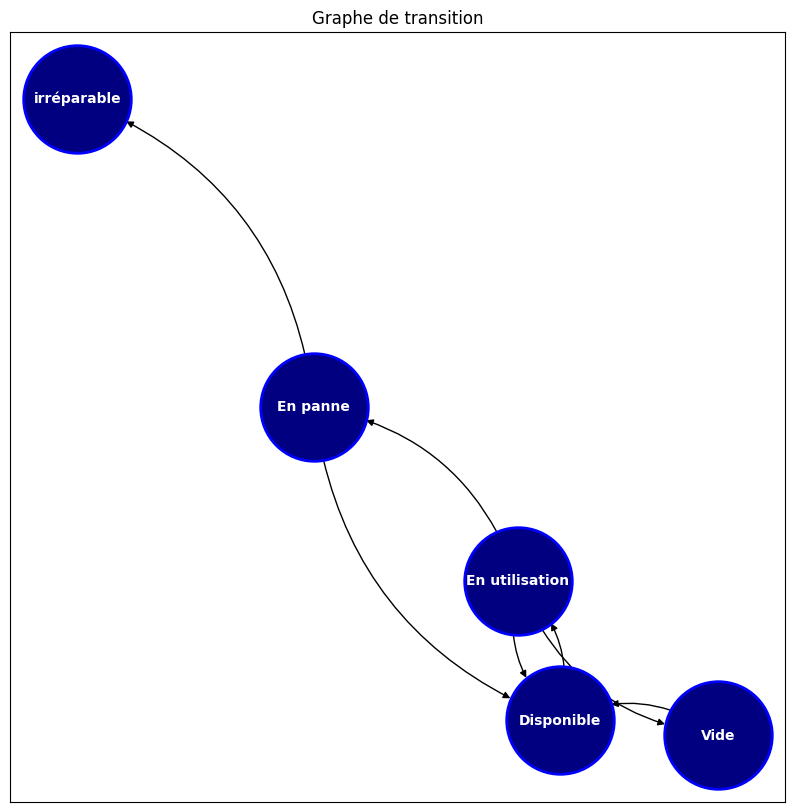

In [93]:
# Dessiner le graphe de transition
G = nx.DiGraph()
plt.figure(figsize=(10, 10))
# Ajouter les nœuds
G.add_edge('Disponible', 'En utilisation')
G.add_edge('En utilisation', 'En panne')
G.add_edge('En utilisation', 'Vide')
G.add_edge('En panne', 'Disponible')
G.add_edge('Vide', 'Disponible')
G.add_edge('En utilisation', 'Disponible')
G.add_edge('En panne', 'irréparable')

# Définir la disposition des nœuds
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), connectionstyle="arc3,rad=0.3", arrows=True, arrowstyle='-|>', node_size=6000)
nx.draw_networkx_nodes(G, pos, node_size=6000, node_color='navy', edgecolors='blue', linewidths=2)

# Ajouter les étiquettes des nœuds
nx.draw_networkx_labels(G, pos, font_size=10, font_color='white', font_weight='bold')
plt.title('Graphe de transition')
plt.show()

<div style="background: linear-gradient(to right, #ff0000, #0000ff); padding: 4px;">
    <h2 style="color: white;"> <strong> Fin </h2>
</div>